In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd


In [10]:
data = pd.read_csv("MNIST/mnist_784_csv.csv")
X = data.drop(columns=["class"]).values
Y = data["class"].values
Y = to_categorical(Y, num_classes=10)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=10)

x_train = x_train / 255.0
x_test = x_test / 255.0

model = Sequential([
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])


In [11]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=['accuracy']
)

result = model.fit(x_train, y_train, epochs=10, validation_split=.1)

Epoch 1/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8727 - loss: 0.4512 - val_accuracy: 0.9529 - val_loss: 0.1644
Epoch 2/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9647 - loss: 0.1241 - val_accuracy: 0.9646 - val_loss: 0.1211
Epoch 3/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9745 - loss: 0.0835 - val_accuracy: 0.9684 - val_loss: 0.1062
Epoch 4/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9824 - loss: 0.0569 - val_accuracy: 0.9655 - val_loss: 0.1095
Epoch 5/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9866 - loss: 0.0422 - val_accuracy: 0.9702 - val_loss: 0.1004
Epoch 6/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9897 - loss: 0.0334 - val_accuracy: 0.9693 - val_loss: 0.1046
Epoch 7/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9919 - loss: 0.0269 - val_accuracy: 0.9727 - val_loss: 0.0991
Epoch 8/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9940 - loss: 0.0207 - 

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"loss: {test_loss}")
print(f"accuracy; {test_acc}")

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.9742 - loss: 0.0982
loss: 0.09932080656290054
accuracy; 0.9746428728103638


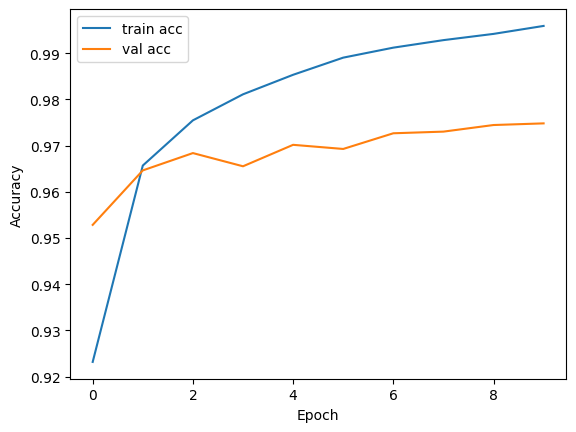

In [19]:
import matplotlib.pyplot as plt

plt.plot(result.history['accuracy'], label='train acc')
plt.plot(result.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

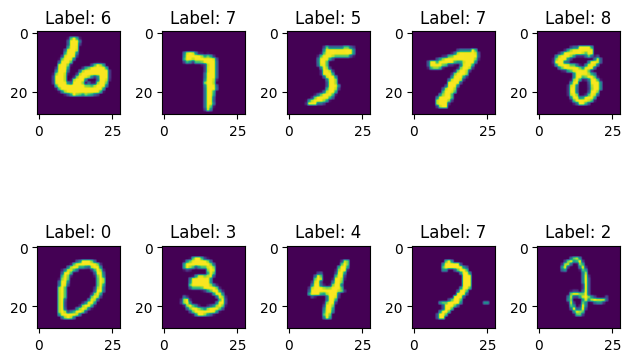

In [31]:
import numpy as np
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.title(f"Label: {np.argmax(y_test[i])}")
plt.tight_layout()
plt.show()

In [30]:
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(model.predict(x_test), axis=1)
print(classification_report(y_true, y_pred))

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1421
           1       0.99      0.99      0.99      1515
           2       0.98      0.97      0.97      1438
           3       0.98      0.96      0.97      1436
           4       0.99      0.97      0.98      1391
           5       0.95      0.98      0.97      1248
           6       0.97      0.99      0.98      1303
           7       0.97      0.98      0.97      1473
           8       0.97      0.96      0.97      1372
           9       0.98      0.96      0.97      1403

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000

